Complete documentation: https://osf.io/4rd8g/
## **Penman-Monteith FAO**

| Method's input | Temp | ShortWave | LongWave | Net Radiation | Wind speed | Humidity | Soil flux | Pressure | Leaf area index | Water content |
| --- | --- | --- | --- | --- | --- | --- | --- | ---  | --- | --- |
| Priestley-Taylor | $\checkmark$ | $\times$ | $\times$ | $\checkmark$ | $\times$ | $\times$ | $\checkmark$ | $     \checkmark$  | $\times$ | $\times$ |
| Penman-Monteith FAO | $\checkmark$ | $\times$ | $\times$ | $\checkmark$ | $\checkmark$ | $\checkmark$ | $\checkmark$ | $\checkmark$  | $\times$ | $\checkmark$ |
| GEOframe | $\checkmark$ | $\checkmark$ | $\checkmark$ | $\times$ | $\checkmark$ | $\checkmark$ | $\checkmark$ | $\checkmark$  | $\checkmark$ | $\checkmark$ |

| Method's input | Temp | ShortWave | LongWave | Net Radiation | Wind speed | Humidity | Soil flux | Pressure | Leaf area index | Water content |
| --- | --- | --- | --- | --- | --- | --- | --- | ---  | --- | --- |
| Priestley-Taylor | $\checkmark$ | $\times$ | $\times$ | $\checkmark$ | $\times$ | $\times$ | $\checkmark$ | $     \checkmark$  | $\times$ | $\times$ |
| Penman-Monteith FAO | $\checkmark$ | $\times$ | $\times$ | $\checkmark$ | $\checkmark$ | $\checkmark$ | $\checkmark$ | $\checkmark$  | $\times$ | $\checkmark$ |
| GEOframe | $\checkmark$ | $\checkmark$ | $\checkmark$ | $\times$ | $\checkmark$ | $\checkmark$ | $\checkmark$ | $\checkmark$  | $\checkmark$ | $\checkmark$ |




### **Component Description**
The GEOframe-NewAge ET component offers two different formulations for the evapotraspiration modeling: the FAO Penman-Monteith model and the PriestleyTaylor model
\begin{equation}
ET_{0}^{FAO} =  K_{s} \cdot K_{c} \cdot \dfrac{0.408\cdot \Delta\cdot (R_{n} - G)+\gamma\cdot u_{2}\cdot(e_{s}-e)\cdot\frac{C_{p}}{T+273}}{\Delta+\gamma\cdot(1+C_{d}\cdot u_{2})}
\end{equation}

\begin{equation}
ET_{0}^{PT} = \alpha\dfrac{\Delta\cdot (R_{n} - G)}{\Delta+\gamma}
\end{equation}
With:
\begin{equation}
 G =  \begin{cases}
   G_{morn}\cdot R_{n} \quad daylight\\G_{night}\cdot R_{n} \quad nighttime
   \end{cases} 
\end{equation}
where:
- $ET_{0}$ or $ET$ are expressed in [$mm \cdot day^{−1}$] or [$mm\cdot hour^{−1}$]; 
- $K_{s}$ is the water stress coefficient [-];
- $K_{c}$ is the crop coefficient [-];
- $R_{n}$ is the net radiation expressed in [$MJ \cdot m^{2} \cdot day^{−1}$] or [$MJ \cdot m^{2}\cdot h^{−1}$]; 
- $G$ is the soil heat flux at the soil surface in [$MJ \cdot m^{2} \cdot day^{−1}$] or [$MJ \cdot m^{2}\cdot h^{−1}$]; 
- $T$ is the mean daily or hourly air temperature expressed in (°C) ; 
- $u_{2}$ is the wind speed in ($m\cdot s^{−1}$); 
- $e_{s}$ is the mean saturation vapor-pressure expressed in ($kP_{a}$); 
- $e$ is the mean actual vapor-pressure; 
- $\Delta$ is the slope of the saturation vapor-pressure curve expressed in ($kP_{a}\dot °C^{−1}$); 
- $\gamma$ is the psychometric constant expressed in ($kP_{a} \cdot$ °$C^{−1}$); 
- $C_{d}$ is a coefficient equal to 0.34 and $C_{p}$ is a coefficient equal to 900 in the case of a daily time step and equal to 37 in the case of a hourly time step.


### **Detailed Inputs description**
General description
The input file is a .csv file containing a header and one or more time series of input data,
depending on the number of stations involved. Each column of the file is associated to a
different station.
The file must have the following header:
- The first 3 rows with general information such as the date of the creation of the file and the author;
- The fourth and fifth rows contain the IDs of the stations (e.g. station number 8:value 8, ID, ,8);
- The sixth row contains the information about the type of the input data (in thiscase, one column with the date and one column with double values);
- The seventh row specifies the date format (YYYY-MM-dd HH:mm).


- #### **Net radiation**
The net radiation is given in time series of ($W/m^{2}$) values. The conversion from ($W/m^{2}$) to ($MJ\cdot m^{2}$) is automatically done by the component.
- #### **Average wind speed**
The average wind speed is given in time series of (m/s) values.
- #### **Relative humidity**
The relative humidity is given in time series or raster maps of (% ) values.
- #### **Air temperature**
The air temperature is given in time series of (°C) values. The conversion in K is directly done by the component.
- #### **$G_{morn}$**
$G_{morn}$ is the coefficient for the soil heat flux during daylight
- #### **$G_{night}$**
$G_{night}$ is the coefficient for the soil heat flux during nighttime
- #### **doHourly**
doHourly is a boolean field to set the time step of the simulation (”true” is hourly time step, ”false” is daily).
- #### **Start Date**
Start Date is a string containing the first day of the simulation.
- #### **Crop Coefficient**
The crop coefficient is a coefficient tipical of the cultivar $\rightarrow$ http://www.fao.org/3/X0490E/x0490e0b.htm#crop%20coefficients TABLE 12
- #### **Water wilting point**
Is defined as the minimal amount of water in the soil that the plant requires not to wilt. 
- #### **Water field capacity**
Field Capacity is the amount of soil moisture in the soil after excess water has drained away and the rate of downward movement has decreased. 
- #### **Roots depth**
Rooting depth in [m] $\rightarrow$ http://www.fao.org/3/X0490E/x0490e0e.htm#total%20available%20water%20(taw) TABLE 22
- #### **Depletion fraction**
Is the average fraction of available water that can be depleted from the root zone before moisture stress occurs.


### **Detailed Outputs description**
The output file will have exactly the same heading of the input file. 
- #### **Time series of the latent heat (W/m$^{2}$)**
The simulated output evapotranspiration is given as a time series at a given point. Its units are ($mm \cdot h^{−1}$) or ($mm \cdot day^{−1}$) depending on the temporal resolution chosen by the end-user.
- #### **Time series of the evapotranspiration (mm)**
The simulated output evapotranspiration is given as a time series at a given point. Its units are ($mm \cdot h^{−1}$) or ($mm \cdot day^{−1}$) depending on the temporal resolution chosen by the end-user.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import os

In [2]:
###########################
### SET THE FOLDER PATH ###
###########################
projFolder = '/home/drugo/Sim/OMS_Project_ET/'
os.chdir(projFolder)

In [ ]:
# %load simulation/Evapotranspiration_FAO.sim
import static oms3.SimBuilder.instance as OMS3
def home = oms_prj

def startDate = "2006-07-01 00:00"
def endDate = "2006-07-31 23:30"
def timestep = 30
OMS3.sim {
     resource "$oms_prj/lib"
     model(while:"readerAirTemperature.doProcess")	{
        components	{
            "readerAirTemperature"              			    "org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"
			"readerWindVelocity"             			        "org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"
			"readerRelativeHumidity"             		        "org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"
			"readerNetRadiation"                                "org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"
			"readerAtmosphericPressure"                         "org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"
			"readerSoilHeatFlux"                                "org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"	
			"readerSoilMosture"              				    "org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"	
			"penmanMonteithFao"              				    "etpPointCase.OmsPenmanMonteithFAO"
			"writerLatentHeatFAO"                			    "org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorWriter"						
			"writerEvapotranspirationFAO"                       "org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorWriter"						
			}
			parameter{		

				//	VEGETATION	&	SOIL	COEFFICIENTS
				"penmanMonteithFao.cropCoefficient"				1.0
				"penmanMonteithFao.waterWiltingPoint"			0.15
				"penmanMonteithFao.waterFieldCapacity"			0.27
				"penmanMonteithFao.rootsDepth"					0.75
				"penmanMonteithFao.depletionFraction"			0.55
								
				//	PARAMETERS
				"penmanMonteithFao.tStartDate"					"${startDate}"
				"penmanMonteithFao.temporalStep"				"${timestep}"
				"penmanMonteithFao.defaultAtmosphericPressure"	101.3
				"penmanMonteithFao.doHourly"					true
								
				//	READERS				
				"readerAirTemperature.file"         			"${home}/data/Temp.csv"
				"readerAirTemperature.idfield"          		"val"		
				"readerAirTemperature.tStart"           		"${startDate}"
				"readerAirTemperature.tEnd"         			"${endDate}"
				"readerAirTemperature.tTimestep"            	"${timestep}"
				"readerAirTemperature.fileNovalue"          	"-9999.0"
								
				"readerWindVelocity.file"                       "${home}/data/Wind.csv"	
				"readerWindVelocity.idfield"                    "val"		
				"readerWindVelocity.tStart"                     "${startDate}"
				"readerWindVelocity.tEnd"                       "${endDate}"
				"readerWindVelocity.tTimestep"                  "${timestep}"
				"readerWindVelocity.fileNovalue"                "-9999.0"
								
				"readerRelativeHumidity.file"                   "${home}/data/RH.csv"
				"readerRelativeHumidity.idfield"                "val"		
				"readerRelativeHumidity.tStart"                 "${startDate}"
				"readerRelativeHumidity.tEnd"                   "${endDate}"
				"readerRelativeHumidity.tTimestep"              "${timestep}"
				"readerRelativeHumidity.fileNovalue"            "-9999.0"
								
				"readerNetRadiation.file"                       "${home}/data/Net.csv"
				"readerNetRadiation.idfield"                    "val"
				"readerNetRadiation.tStart"                     "${startDate}"
				"readerNetRadiation.tEnd"                       "${endDate}"
				"readerNetRadiation.tTimestep"                  "${timestep}"
				"readerNetRadiation.fileNovalue"                "-9999.0"
						
				"readerAtmosphericPressure.file"                "${home}/data/Pres.csv"
				"readerAtmosphericPressure.idfield"             "val"		
				"readerAtmosphericPressure.tStart"              "${startDate}"
				"readerAtmosphericPressure.tEnd"                "${endDate}"
				"readerAtmosphericPressure.tTimestep"           "${timestep}"
				"readerAtmosphericPressure.fileNovalue"         "-9999.0"
								
				"readerSoilHeatFlux.file"                       "${home}/data/GHF.csv"	
                "readerSoilHeatFlux.idfield"                    "val"		
                "readerSoilHeatFlux.tStart"                     "${startDate}"
                "readerSoilHeatFlux.tEnd"                       "${endDate}"
                "readerSoilHeatFlux.tTimestep"                  "${timestep}"
                "readerSoilHeatFlux.fileNovalue"                "-9999.0"			
		
				"readerSoilMosture.file"                        "${home}/data/SWC.csv"	
                "readerSoilMosture.idfield"                     "val"		
                "readerSoilMosture.tStart"                      "${startDate}"
                "readerSoilMosture.tEnd"                        "${endDate}"
                "readerSoilMosture.tTimestep"                   "${timestep}"
                "readerSoilMosture.fileNovalue"                 "-9999.0"																				
		
                //	WRITERS
                "writerEvapotranspirationFAO.file"				"${home}/output/Evapotranspiration_FAO/evapotranspiration_FAO.csv"	
				"writerEvapotranspirationFAO.tStart"			"${startDate}"
				"writerEvapotranspirationFAO.tTimestep"	        "${timestep}"
						              
				"writerLatentHeatFAO.file"						"${home}/output/Evapotranspiration_FAO/latentHeat_FAO.csv"	
				"writerLatentHeatFAO.tStart"					"${startDate}"
				"writerLatentHeatFAO.tTimestep"					"${timestep}"
            }
            connect	{
                "readerAirTemperature.outData"					"penmanMonteithFao.inAirTemperature"
				"readerWindVelocity.outData"					"penmanMonteithFao.inWindVelocity"
				"readerRelativeHumidity.outData"				"penmanMonteithFao.inRelativeHumidity"
				"readerNetRadiation.outData"					"penmanMonteithFao.inNetRadiation"
				"readerAtmosphericPressure.outData"				"penmanMonteithFao.inAtmosphericPressure"
				"readerSoilHeatFlux.outData"					"penmanMonteithFao.inSoilFlux"
				"readerSoilMosture.outData"						"penmanMonteithFao.inSoilMosture"									
				"penmanMonteithFao.outEvapotranspirationFao"	"writerEvapotranspirationFAO.inData"
				"penmanMonteithFao.outLatentHeatFao"			"writerLatentHeatFAO.inData"
				}
			}
		}


In [5]:
# !docker run --rm -it -v $(pwd):/work omslab/oms simulation/Evapotranspiration_FAO.sim

In [6]:
print(os.listdir('output/Evapotranspiration_FAO/'))

['evapotranspiration_FAO.csv', 'ET_FAO.csv', 'latentHeat_FAO.csv']


In [25]:
df = pd.read_csv('output/Evapotranspiration_FAO/evapotranspiration_FAO.csv',
                 skiprows=6, sep=',', parse_dates=[0], 
                 na_values=-9999,usecols=[1,2])
df.head(3)

,yyyy-MM-dd HH:mm,Unnamed: 2
0,2006-07-01 00:00:00,0.0
1,2006-07-01 00:30:00,0.0
2,2006-07-01 01:00:00,0.0


In [26]:
df.columns = ['Datetime','El fao']
df.index = df['Datetime']
df = df.iloc[:,1:]
df.head(3)

,El fao
Datetime,
2006-07-01 00:00:00,0.0
2006-07-01 00:30:00,0.0
2006-07-01 01:00:00,0.0


In [27]:
df.describe()

,El fao
count,1488.000000
mean,0.081820
std,0.105382
min,0.000000
25%,0.000000
50%,0.011091
75%,0.163013
max,0.362380


In [28]:
mask = (df.index > '2006-07-01 00:00:00') & (df.index < '2006-07-01 23:00:00')
dfDay = df.iloc[mask]
dfDay.tail()

,El fao
Datetime,
2006-07-01 20:30:00,0.0
2006-07-01 21:00:00,0.0
2006-07-01 21:30:00,0.0
2006-07-01 22:00:00,0.0
2006-07-01 22:30:00,0.0


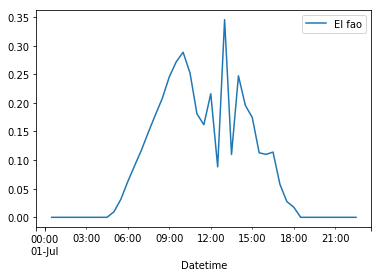

In [29]:
dfDay.plot()